<a href="https://colab.research.google.com/github/vlad-danaila/pytorch-pmneumonia-xray-classification/blob/master/Pneumonia_x_ray_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia detection from x-ray images

## Preliminary steps

### Read the article

The dataset we are using is associated with an article. You are encouraged to read this article for understanding the bigger picture and the utility of solving this problem. Also, in this article, you will find out about another application of deep learning for the diagnosis of retina-related diseases. 

Web-version:
https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

PDF version:
https://doi.org/10.1016/j.cell.2018.02.010

Article citation (Bibtex format):
﻿@Article{Kermany2018,
author={Kermany, Daniel S.
and Goldbaum, Michael
and Cai, Wenjia
and Valentim, Carolina C.S.
and Liang, Huiying
and Baxter, Sally L.
and McKeown, Alex
and Yang, Ge
and Wu, Xiaokang
and Yan, Fangbing
and Dong, Justin
and Prasadha, Made K.
and Pei, Jacqueline
and Ting, Magdalene Y.L.
and Zhu, Jie
and Li, Christina
and Hewett, Sierra
and Dong, Jason
and Ziyar, Ian
and Shi, Alexander
and Zhang, Runze
and Zheng, Lianghong
and Hou, Rui
and Shi, William
and Fu, Xin
and Duan, Yaou
and Huu, Viet A.N.
and Wen, Cindy
and Zhang, Edward D.
and Zhang, Charlotte L.
and Li, Oulan
and Wang, Xiaobo
and Singer, Michael A.
and Sun, Xiaodong
and Xu, Jie
and Tafreshi, Ali
and Lewis, M. Anthony
and Xia, Huimin
and Zhang, Kang},
title={Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning},
journal={Cell},
year={2018},
month={Feb},
day={22},
publisher={Elsevier},
volume={172},
number={5},
pages={1122-1131.e9},
issn={0092-8674},
doi={10.1016/j.cell.2018.02.010},
url={https://doi.org/10.1016/j.cell.2018.02.010}
}

### Read about numpy

Numpy is probably the most popular Python framework for tensor(multidimensional array) manipulation. Even though we will use less Numpy and more Pytorch throughout this notebook, learning Numpy helps in understanding the overall concepts. As you learn, you will notice that many operations are similar to both frameworks, the concept is identical only the API is different. If studying machine learning, knowledge about tensor manipulation is a must. As you develop a neural network, please try to be aware of the shape and size of the tensors being processed at each step. This will make debugging much easier. 

I would recommend the official Numpy tutorials and documentation. This link navigates to a basic tutorial:
https://numpy.org/devdocs/user/quickstart.html

### Read about Pytorch

Pytorch is the predominant framework used in this notebook. It is recommended that you have some basic knowledge about it before proceeding. Pytorch has excellent documentation, made out of several tutorials both for beginners and advanced users. It is also very practical because it provides examples for most cases of neural network types of applications.

The official documentation:
https://pytorch.org/tutorials/

I would recommend the following tutorials, however, I encourage you to study even more.

Introduction to Pytorch:
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

Transfer learning and computer vision:
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

## Enable GPU

**Before you start using this notebook please enable the free GPU available.** Without it, the notebook will be very slow. For doing so navigate to the menu "Runtime" and select "Change runtime type". Then enable the GPU from the "Hardware accelerator" section. 

If you are not used to Jupyter notebooks or Google Colab please look into this tutorial before starting:

https://colab.research.google.com/notebooks/welcome.ipynb

## Dataset

### Dataset description

We are using the **Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification** dataset having the DOI: http://dx.doi.org/10.17632/rscbjbr9sj.2#file-41d542e7-7f91-47f6-9ff2-dd8e5a5a7861

We will be using only a part of this dataset, the chest x-rays. The dataset presents x-ray images belonging to three types of patients: healthy, with bacterial pneumonia, and with viral pneumonia. In this exercise, you are expected to classify the x-ray images in the three classes: normal (label 0), bacterial pneumonia (label 1), viral pneumonia (label 2).

This dataset is licensed under the **Creative Commons Attribution 4.0 International license** (https://creativecommons.org/licenses/by/4.0/).

Dataset citation:
Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, v2
http://dx.doi.org/10.17632/rscbjbr9sj.2




### Download the dataset

You can download the dataset from the Mendeley platform using this link below and then import the data into your Google Colab Notebook.

https://data.mendeley.com/datasets/rscbjbr9sj/2?__hstc=25856994.be3dbd5db84ba14dfd19a1aa3e4fc529.1594052578461.1594052578461.1594143569928.2&__hssc=25856994.1.1594143569928&__hsfp=1711534886

Please download only the **ChestXRay2017.zip** file.

Once you downloaded the file you can upload it to your Google Colab notebook. Check out the left side region of the Colab window for uploading the file, you should look for an icon that looks like a folder. This will open up the "Files" section. In there, you will notice an "Upload" button. Even though it is the most simple way, it is **not recommended** to work like this. The upload may be slow and when working on Google Colab you are actually on a virtual machine, which gets wiped out once you disconnect thus, the files will get lost. You would need to do the upload each time you reconnect.

A better way of working would be to upload the dataset to your Google Drive. Then, each time you reconnect, you can mount your Google Drive to the Colab environment. The process is simple and will save a lot of time in the long run. To mount your Google Drive, you need to run the code below. You should note the mounted drive in the files section of Colab, please check the left side of the window.

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except Exception as e:
  print('Are you running in a Google Colab environment ?')
  print(e)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The script below clears the dataset folder, then it recreates it. Next, it unzips the dataset into it. In the previous step, you either uploaded the file directly from Colab, either to Google Drive, depending on your option please uncomment the relevant line in the script and comment the other. **The path to the file may not match exactly, please modify accordingly.** Once the script finishes please refresh the files view to notice the downloaded files. Inside the dataset folder, you should notice a "data" folder containing two sub-folders "train" and "test". Each of those folders contain folders labeled from zero to three, those correspond to each of the classes.

**Please note the way to run UNIX commands from Colab, simply put a "!" in front of the statement.**

In [ ]:
!rm -vrf "dataset"
!mkdir "dataset"

# If using Google Drive:
!cp -r "/content/drive/My Drive/ChestXRay2017.zip" "dataset/ChestXRay2017.zip"

# If not using Google Drive
# !cp -r "/content/ChestXRay2017.zip" "dataset/ChestXRay2017.zip"

!unzip "dataset/ChestXRay2017.zip" -d "dataset"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/chest_xray/train/PNEUMONIA/person802_bacteria_2708.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person825_bacteria_2736.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person28_bacteria_141.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person494_bacteria_2090.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person62_bacteria_300.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person1328_virus_2295.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person1109_bacteria_3050.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person554_bacteria_2320.jpeg  
  inflating: dataset/chest_xray/train/PNEUMONIA/person573_bacteria_2369.jpeg  
  infla

## Preparation

### Download dependencies

**pip is the default Python package manager**, it gets installed together with Python. The command below installs the dependencies we need.

In [ ]:
!pip3 install torch torchvision sklearn matplotlib GPUtil

### Imports

In [ ]:
import torch as t
import torchvision as tv
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.metrics
import os
import time
import random
import GPUtil
import glob
import math
import random
from sklearn.model_selection import KFold 

### Constants

In [ ]:
DATASET_PATH = '/content/dataset/chest_xray/'
TRAIN_PATH = DATASET_PATH + 'train/'
TEST_PATH = DATASET_PATH + 'test/'
IMAGE_SIZE = (200, 300)
BATCH_SIZE = 32
LEARNING_RATE = 1e-5
EPOCHS = 15
CROSS_VALIDATION_FOLDS = 4
CROSS_VALIDATION_SPLITS_FILE = 'cross_validation_splits'
DEVICE_NAME = 'cuda:0' if t.cuda.is_available() else 'cpu'
DEVICE = t.device(DEVICE_NAME)
ADAM_WEIGHT_DECAY = 0
GRAYSCALE = True

### Memory management

While training neural networks, it's not uncommon for a GPU to run out of memory. The cell below displays how much memory has each GPU and how much of it is already allocated. If running out of memory you should restart the runtime, if this does not fix the problem please gradually decrease the batch size.

In [ ]:
def memory_stats():
  try:
    count = 1
    for gpu in GPUtil.getGPUs():
      print('GPU', count, 'Memory')
      print('-----------------------')
      print('Total:', gpu.memoryTotal)
      print('Free:', gpu.memoryFree)
      print('Used:', gpu.memoryUsed)
      print('Used percent:', gpu.memoryUtil * 100, '%')
      print('-----------------------')
      count += 1  
  except Exception as e:
    print('Did you enable the GPU ?')
    print(e)

memory_stats()

GPU 1 Memory
-----------------------
Total: 16280.0
Free: 16270.0
Used: 10.0
Used percent: 0.06142506142506143 %
-----------------------


### Deterministic measurements

These statements help to make the experiments reproducible by fixing the random seeds. Despite fixing the random seeds, experiments are usually not reproducible using different PyTorch releases, commits, platforms, or between CPU and GPU executions. Please find more details in the PyTorch documentation:

https://pytorch.org/docs/stable/notes/randomness.html

In [ ]:
SEED = 0
t.manual_seed(SEED)
t.cuda.manual_seed(SEED)
t.cuda.manual_seed_all(SEED)
t.backends.cudnn.deterministic = True
t.backends.cudnn.benchmark = False
np.random.seed(SEED)
random.seed(SEED)

## Data loading and augmentation

It is a best practice to split the dataset into three subsets: training, validation, and test. 

The training dataset is used for updating the network parameters. The validation dataset is used for ensuring model generalization. It is used for stoping the training process before overfitting occurs and it also helps in deciding upon model and parameter selection. Last, the test dataset is used only for evaluating the model. 

The right process is to train the model using the training set, and first evaluate based on the validation set. When more variations are tried out, those should be evaluated on the validation set. The test set should be used only in the end, for reporting the final metrics. This ensures that the model can generalize well and does not overfit on any of the training or validation sets. Even if overfitting on the validation set is less probable it can occur, consequently, this strategy ensures a more objective evaluation of the model. The only time when we can use only a training and test set is when the dataset is too small.

Cross-validation is another useful technique that should be combined with the dataset split. Cross-validation implies training and evaluating the model on more combinations of training and validation sets. Usually a certain portion from the samples is used for validation. For example, we can use 25% of the samples for validation and the rest of 75% for training. In this case, we will train the network 4 times, each time picking up different 25% and 75% samples. The validation set should not contain any common samples between multiple rounds of cross-validation. The developer should use cross-validation between the training and validation sets for assessing the initial performance of the model. This can be done by calculating the metrics on each cross-validation round and then taking an average or a minimum over those metrics. As a final step, the test set is used for reporting the final metrics (but not used anywhere else). 

We will implement the strategy described above: dataset split and cross-validation. We already have a test dataset, therefore we only need to handle the training sets and validation sets in the context of cross-validation.

This function returns the paths of all images from a folder.

In [ ]:
def image_paths(folder_path):
  return glob.glob(folder_path + '/**/*.jpeg', recursive=True)

train_paths = image_paths(TRAIN_PATH)

The method creates a dictionary which groups the paths of the images by their label. The keys in the dictionary are the class labels while the values are lists of image paths.

In [ ]:
def paths_by_labels(paths):
  # each key is a class label
  map = { 0: [], 1: [], 2: [] }
  for path in paths:
    # the files have certain naming conventions which allow us to detect the label
    label = 1 if 'bacteria' in path else \
            2 if 'virus' in path else \
            0
    map[label].append(path)
  # transform the lists to numpy arrays for better usability
  for i in range(len(map)):
    map[i] = np.array(map[i])
  return map

### Dataset imbalance
Dataset imbalance is a common problem when training models. In some cases, we think that we have many training samples, later to find that a specific class has only a few training samples available. This can cause selection bias as well as poor performance. Let us check the number of training samples for each class and make sure there are enough training samples available.

Please also observe how we plot a simple pie-chart.

1349 samples of NORMAL patients (25.783639143730884 %)
2538 samples of BACTERIAL pmneumonia (48.50917431192661 %)
1345 samples of VIRAL pmneumonia (25.70718654434251 %)


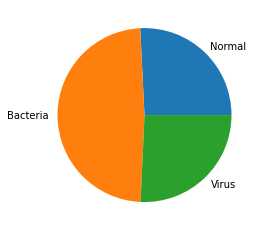

In [ ]:
def labels_distribution_stats(paths):
  by_labels = paths_by_labels(paths)

  len_normal = len(by_labels[0])
  len_bacteria = len(by_labels[1])
  len_virus = len(by_labels[2])

  total = len_normal + len_bacteria + len_virus

  ratio_normal = len_normal / total
  ratio_bacteria = len_bacteria / total
  ratio_virus = len_virus / total

  print('{} samples of NORMAL patients ({} %)'.format(len_normal, ratio_normal * 100))
  print('{} samples of BACTERIAL pmneumonia ({} %)'.format(len_bacteria, ratio_bacteria * 100))
  print('{} samples of VIRAL pmneumonia ({} %)'.format(len_virus, ratio_virus * 100))

  plt.pie([len_normal, len_bacteria, len_virus], labels=['Normal', 'Bacteria', 'Virus'])

labels_distribution_stats(train_paths)
plt.show()

### Cross-validation splits

We create cross-validation splits for training and validation data using the KFold class from the sklearn package. Each split is a tuple containing two lists, one for training and one for validation. Each list contains the indices of the selected images. Once we create these splits, we loop through them and save them to a file for later use. In the loop, we also print some statistics, like how many samples are available for each class. It is important to have balanced training and validation subsets. As can be noted from the plots, the distribution of the classes is similar between the splits.

To ensure reproducible results, we want to use the same cross-validation splits in all experiments for a fair comparison. For this reason, we save the splits to a file. We run the method of creating the splits only if we don't have any splits available (if the file is missing).

Train
1015 samples of NORMAL patients (25.866462793068294 %)
1899 samples of BACTERIAL pmneumonia (48.39449541284404 %)
1010 samples of VIRAL pmneumonia (25.739041794087665 %)


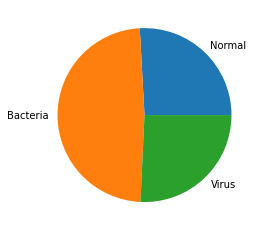

Validation
334 samples of NORMAL patients (25.535168195718654 %)
639 samples of BACTERIAL pmneumonia (48.853211009174316 %)
335 samples of VIRAL pmneumonia (25.611620795107033 %)


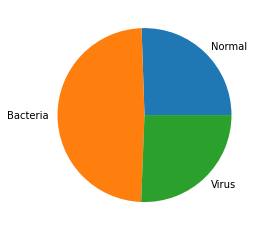

Train
1007 samples of NORMAL patients (25.662589194699287 %)
1914 samples of BACTERIAL pmneumonia (48.776758409785934 %)
1003 samples of VIRAL pmneumonia (25.560652395514783 %)


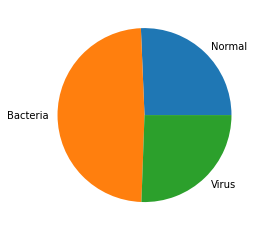

Validation
342 samples of NORMAL patients (26.146788990825687 %)
624 samples of BACTERIAL pmneumonia (47.706422018348626 %)
342 samples of VIRAL pmneumonia (26.146788990825687 %)


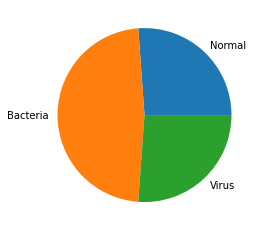

Train
1003 samples of NORMAL patients (25.560652395514783 %)
1904 samples of BACTERIAL pmneumonia (48.52191641182467 %)
1017 samples of VIRAL pmneumonia (25.91743119266055 %)


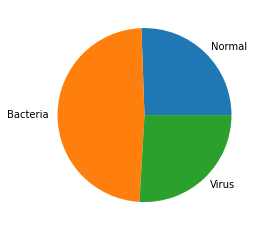

Validation
346 samples of NORMAL patients (26.452599388379205 %)
634 samples of BACTERIAL pmneumonia (48.47094801223242 %)
328 samples of VIRAL pmneumonia (25.076452599388375 %)


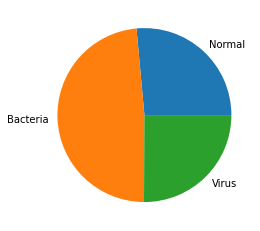

Train
1022 samples of NORMAL patients (26.044852191641183 %)
1897 samples of BACTERIAL pmneumonia (48.34352701325179 %)
1005 samples of VIRAL pmneumonia (25.611620795107033 %)


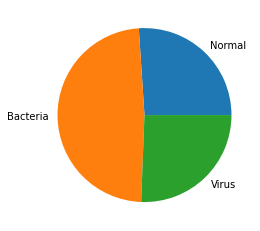

Validation
327 samples of NORMAL patients (25.0 %)
641 samples of BACTERIAL pmneumonia (49.006116207951074 %)
340 samples of VIRAL pmneumonia (25.993883792048926 %)


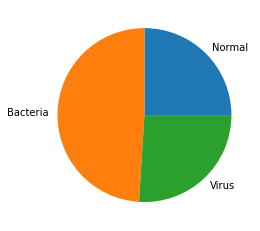

In [ ]:
# save the cross-validation splits to a file
def create_cross_validation_splits(paths):
  # CROSS_VALIDATION_FOLDS is the number of cross-validation rounds
  # Notice the data will be shuffled
  kf = KFold(n_splits = CROSS_VALIDATION_FOLDS, shuffle = True)
  
  # Splits is an array of tuples, each tuple contains 2 numpy arrays: one for training and one for validation.
  # Each of the numpy arrays (contained in the tuples) represent the indices of the data in the argument array (paths variable in our case).
  splits = kf.split(paths)
  
  # We transform to numpy array for easier indexing. 
  # For example you can index a numpy array with another numpy array (not possible with lists). 
  # We will use this technique below, to select the training and validation data.
  paths_array = np.array(paths)
  
  # Open a file for writing the cross-validation spits to it
  # We will define a protocol for saving the splits, we write on a line 'train' or 'validation'
  # and on the next line we save the selected indices separated by blank spaces.
  with open(CROSS_VALIDATION_SPLITS_FILE, 'w') as file:

    # Iterate through the cross-validation splits, 
    # train and validation are the indexes, not the data
    for train, validation in splits:
      
      # Save to file
      file.write('train\n')
      # Notice the Python 'comprehension' syntax. 
      # If not familiar with it, please check the web, there are many examples.
      file.write(' '.join([str(n) for n in train]) + '\n')
      file.write('validation\n')
      file.write(' '.join([str(n) for n in validation]) + '\n')
      
      # Sample the data based on the selected indices
      sampled_train = paths_array[train]
      sampled_validation = paths_array[validation]
      
      # Plot distribution of classes
      print('Train')
      labels_distribution_stats(sampled_train)
      plt.show()
      print('Validation')
      labels_distribution_stats(sampled_validation)
      plt.show()

# Create the splits only if not already available
if not os.path.exists(CROSS_VALIDATION_SPLITS_FILE):
  create_cross_validation_splits(train_paths)

We load the cross-validation splits from the file.

In [ ]:
# For reading the cross-validation splits we use the same protocol as for writing.
# A line contains the 'train' or 'validation' marker, then the next line contains the indices used in the cross-validation split.
def read_cross_validation_splits_from_file():
  # Open file in reading mode (the 'r' argument)
  with open(CROSS_VALIDATION_SPLITS_FILE, 'r') as file:
    cross_validation_splits = []
    line = file.readline()
    while line:
      assert line == 'train\n'
      train_indexes = file.readline()
      train_indexes = [int(s) for s in train_indexes.split(' ')]
      line = file.readline()
      assert line == 'validation\n'
      val_indexes = file.readline()
      val_indexes = [int(s) for s in val_indexes.split(' ')]
      cross_validation_splits.append((train_indexes, val_indexes))
      line = file.readline()
    return cross_validation_splits

cross_validation_splits = read_cross_validation_splits_from_file()

### Data augmentation

We define a dataset that can apply dynamic and static transformations to images. The static transformations are applied when initializing the dataset, while the dynamic ones are applied whenever loading a batch of images.

Defining a dataset requires us to extend a PyTorch class "torch.utils.data.Dataset" and overwrite the methods __getitem__ and __len__. For more details please view this interesting tutorial from the PyTorch documentation: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [ ]:
class ChestXRayDataset(t.utils.data.Dataset):

  def __init__(self, paths, transforms_x_static = None, transforms_x_dynamic = None, transforms_y_static = None, transforms_y_dynamic = None):
    self.dataset = []
    self.transforms_x = transforms_x_dynamic
    self.transforms_y = transforms_y_dynamic
    for path in paths:
      # We find the label based on the file naming conventions
      label = 1 if 'bacteria' in path else \
          2 if 'virus' in path else \
          0
      img = pil.Image.open(path)
      # Static transforms are applied on dataset initialization
      if transforms_x_static != None:
        img = transforms_x_static(img)
      if transforms_y_static != None:
        label = transforms_y_static(label)
      self.dataset.append((img, label))

  def __getitem__(self, i):
    x, y = self.dataset[i]
    # Dynamic transformations are applied every time images load
    if self.transforms_x != None:
      x = self.transforms_x(x)
    if self.transforms_y != None:
      y = self.transforms_y(y)
    return x, y

  def __len__(self):
    return len(self.dataset)

Neural networks work best when presented to vast amounts of data. For a computer vision task, the dataset we use can be considered small. To mitigate reduced training sets we can use image augmentation. This technique creates new training samples from existing ones by applying different transformations to the images, such as deformations, swiping the images vertically or horizontally, zoom, and color variations.

In [ ]:
# The images in the dataset are grayscale, however, some of them are saved in RGB (contain 3 channels, for red, green, blue) format 
# while other in grayscale format (contains a single channel).
# For this reason we need to transform them all to the same format, either grayscale or RGB.
# Sometimes, we might want to transform grayscale images to RGB for compatibility with a pre-trained network.
# Other times we might want to transform a colored image to grayscale for simplicity or because the color is unimportant for the task.
def color_scheme():
  if GRAYSCALE:
    return tv.transforms.Grayscale()
  else:
    return tv.transforms.Lambda(lambda img: img.convert("RGB"))

In [ ]:
# input transformation for the training set
# the torch vision (tv) package provides many predefined transformations to choose from
transforms_train = tv.transforms.Compose([
    color_scheme(),
    tv.transforms.Resize(IMAGE_SIZE),
    # performs rotation between 0 and 20 degrees, scaling between 100% to 120% and no shear deformation (measured in degrees)                                    
    tv.transforms.RandomAffine(degrees  = 20, translate = None, scale = (1., 1.2), shear = 0),  
    # resizes the image
    tv.transforms.Resize(IMAGE_SIZE),
    # flips the image horizontally with a 1/2 probability
    tv.transforms.RandomHorizontalFlip(),
    # turns the image which is in PIL format to PyTorch tensor
    tv.transforms.ToTensor(),
    # a custom defined transformation for placing the tensor on the GPU, the tensor is on CPU by default
    tv.transforms.Lambda(lambda t: t.to(device = DEVICE))
])

# input transformation for test set
transforms_test = tv.transforms.Compose([
    color_scheme(),
    # resizes the image
    tv.transforms.Resize(IMAGE_SIZE),
    # turns the image which is in PIL format to PyTorch tensor
    tv.transforms.ToTensor()
])

# output transformation of test set, transforms y into a PyTorch tensor of type long and places it on the device (usualy a GPU named 'cuda:0')
y_transform = tv.transforms.Lambda(lambda y: t.tensor(y, dtype=t.long, device = DEVICE))

The dataset and a dataset loader are two different things in PyTorch. The dataset, represents the data itself, while the loader batches the data and performs data augmentation(applies certain transforms for data variety). Furthermore, we can choose to shuffle the data at train time, preventing the network from learning fixed patterns, data shuffling is not needed for network testing(evaluation). We will be using the same data loading and augmentation scheme for both validation and test sets. These functions expect as arguments lists of image file paths.

In [ ]:
# loader for train data
def train_loader(paths):
  dataset_train = ChestXRayDataset(paths, transforms_x_dynamic = transforms_train, transforms_y_dynamic = y_transform)
  loader_train = t.utils.data.DataLoader(dataset_train, BATCH_SIZE, shuffle = True, num_workers = 0)
  return loader_train

# reuse this loader for both test and validation data
def test_loader(paths):
  # Notice the use of both static and dynamic transformation, the static ones execute when the loader is created,
  # while the dynamic ones execute when an element is retrieved from the dataset.
  # In this case, because the test set is smaller we can load and keep all test images in memory.
  # However we keep those images on the CPU and feed them to the GPU on demand (notice the dynamic transform) to save GPU memory.
  dataset_test = ChestXRayDataset(paths, transforms_x_static = transforms_test, 
    transforms_x_dynamic = tv.transforms.Lambda(lambda t: t.to(device = DEVICE)), transforms_y_dynamic = y_transform)
  # no shuffling
  loader_test = t.utils.data.DataLoader(dataset_test, BATCH_SIZE, shuffle = False, num_workers = 0)
  return loader_test

### Visualize data

Utility function to convert PyTorch tensor to Numpy array. Numpy is probably the most popular Python package for tensor handling and mathematical computing, forming around itself a whole ecosystem, please find our more at the Numpy homepage: https://numpy.org/

In [ ]:
# places the tensor on cpu, it detaches it from gradient computation and then transforms it to numpy array
def to_numpy(x):
  return x.cpu().detach().numpy()

Functions for plotting one or more images. Please note the usage of matplotlib, one of the most advanced plotting libraries in Python.

In [ ]:
def plot_prediction(x, label):
  if GRAYSCALE:
    # remove the first dimension of the tensor, 
    # it is needed in the convolutional operations,
    # but not needed for plotting
    x = x.reshape(x.shape[1:])
  # transform to numpy arrays
  x, label = to_numpy(x), to_numpy(label)
  if not GRAYSCALE:
    # Matplotlib imshow function expects image format having the channels as a last dimension, 
    # while Pytorch expects the image channels as a first dimension. 
    x = np.transpose(x, [1, 2, 0])
  # plot one image
  plt.title(label)
  plt.imshow(x, cmap = 'gray')

# compose a single plot out of multiple plots, we will obtain a 5 images matrix
def plot_predictions(imgs, labels):  
  fig = plt.figure(figsize = (20, 10))
  for i in range(5):
    fig.add_subplot(1, 5, i + 1, xticks = [], yticks = [])
    plot_prediction(imgs[i], labels[i])

Load a few images from the training set, so that we can visualize the effects of data augmentation.

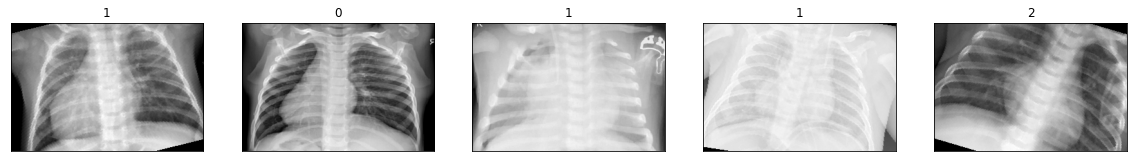

In [ ]:
# load images and ground truth labels from the dataset loader
x, y = next(iter(train_loader(train_paths)))
plot_predictions(x, y)

## Define the model

We will be using a ResNet model having 18 layers, pre-trained on ImageNet.

Please learn more about this architecture by reading this paper:
https://arxiv.org/abs/1512.03385

Also please check out the torch vision documentation of the models available:
https://pytorch.org/docs/stable/torchvision/models.html

Please try to experiment with other models as well.

In [ ]:
def get_resnet_18():
  # download the model
  model = tv.models.resnet18(pretrained = True)
  # If we use grayscale images replace the first convolutional layer which was designed to take 3 channels (red, green, blue).
  # Our layer will use a single channel since grayscale images are represented as a single matrix containing the intensity of white color.
  if GRAYSCALE:
    model.conv1 = t.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  # the model is pre-trained on ImageNet which is a 1000 classification problem, we change the last layer of the network to classify only 3 classes.
  model.fc.out_features = 3
  # we place the model on the GPU if available
  model = model.to(device = DEVICE)
  # t.nn.DataParrallel trains the model on multiple GPU if available, if not it trains on a single one
  model = t.nn.DataParallel(model)
  return model

## Train & evaluate

In our case, we will train the network in a supervised manner. Supervised training requires the network prediction and the expected result, which is usually called "ground truth". The error is calculated by a loss function which receives as parameters the tensors representing the ground truth and the network prediction. The loss function outputs a scalar value for each training sample, representing the magnitude of the error. In order to make the network learn, we differentiate the loss value with respect to each network parameter (which is a tensor). This implies that the whole network, including the loss function, needs to be a sequence of differentiable operations. Software implementations make our lives very easy, because they implement the differentiation in an automatic way, by building a computational graph, in which each node represents an operation and each vertex the resulting tensor. Each node (operation) has associated its specific differentiation function. By exploiting the chain rule, each operation (starting from the loss function) is differentiated with respect to its tensors, and those are differentiated recursively with respect to their parent tensors until the differentiation chain reaches the network parameters. Next, each parameter of the network is updated by the negative value of the calculated gradient (derivative of the loss with respect to a network parameter) multiplied by a small number named learning rate. Typically values for the learning rate are between 1e-3 to 1e-5. The learning rate assures proper convergence of the algorithm and its value is crucial in the process of training. After each update of parameters, the network makes the loss value smaller and smaller, thus training of a neural network implies minimizing the loss function with respect to the network parameters. The update of network parameters using the gradients and the learning rate is handled by the optimizer object defined below. The calculation of the network prediction and loss form the forward pass of the network, the calculation of gradients(derivatives of loss with respect to network parameters) forms the backward pass.

In [ ]:
# these constants will be used to index through arrays of metrics,
# thus in those arrays the loss will be at index zero, and the accuracy at index 1
LOSS = 0
ACCURACY = 1

In [ ]:
# This function performs a forward pass of the network and records the metrics. 
# If training is ebabled, a backword pass and network parameter updates are also performed.
def run_network(model, loader, loss_fn, optimizer = None, isTrain = False):
  # metrics will hold the loss and accuracy
  metrics = np.zeros(2)
  # we calculate a weighted average by the number of samples in each batch,
  # all batches will have the same number of elements (weight one), except
  # for the last one which will have less elements (will have subunitary weight)
  total_weight = 0

  # Iterate through the dataset using the data loader
  for x, y in loader:
    # Network forward pass
    y_pred = model.forward(x)
    # Calculate loss value
    loss = loss_fn(y_pred, y)
    
    # Backword pass
    if isTrain:
      assert optimizer != None
      # Gradient backwords propagation 
      loss.backward()
      # Network parameter updates
      optimizer.step()
      # Refresh optimizer state
      optimizer.zero_grad()
    
    # Calculate prediction: y_pred is a batch of arrays of probabilities (there is a probability for each class), 
    # the predicted classes(variable pred) are found by recording the indexes 
    # corresponding to the biggest probabilities in the arrays from y_pred
    y_pred, y = to_numpy(y_pred), to_numpy(y)
    pred = y_pred.argmax(axis = 1)
    
    # The last batch have fewer elements then the rest. 
    # For this reason we weight each metric by the population size of the batch using the variable named 'weight'
    weight = len(y) / BATCH_SIZE
    metrics[LOSS] += (loss.item() * weight)
    metrics[ACCURACY] += (sk.metrics.accuracy_score(y, pred) * weight)
    total_weight += weight

  metrics /= total_weight
  return metrics

The training happens in a loop, for a certain number of iterations, also named epochs. For each epoch, we go through the whole training dataset and evaluate the model on the validation set. We record the metrics for both the training set and the validation set. If the accuracy on the validation set is bigger then in the previous rounds we save a checkpoint of the model(we serialize the model). This way, at the end of the training, we are left with a checkpoint of the model that recorded the best accuracy on the test set.

Please check out this PyTorch tutorial for further details about model saving and loading: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Evaluate
def eval_network(model, loader, loss_fn):
  # We enable evaluation mode on the model. 
  # This disables all dropout layers. Batch normalization layers are very important to the performance 
  # of the network and are used extensively in most networks. Most often, these layers record statistics 
  # during the training phase and use them in the evaluation phase. Consequently, we need to tell the network 
  # in what state it is (training vs evaluation). Batch normalization is an important concept for neural network
  # training and it influences the performance a lot. For more details please check the documentation:
  # https://pytorch.org/docs/master/generated/torch.nn.BatchNorm2d.html
  model.eval()
  # During testing we do not calculate any gradients, nor perform any network parameter updates
  with t.no_grad():
    test_metrics = run_network(model, loader, loss_fn, isTrain = False)
    return test_metrics

# Train
def train_network(model, loader_train, loader_val, cross_validation_round):
  loss_fn = t.nn.CrossEntropyLoss()
  # The optimizer updates the parameters of the model during training
  optimizer = t.optim.Adam(model.parameters(), lr = LEARNING_RATE, weight_decay = ADAM_WEIGHT_DECAY)

  # We'll store the metrics per each epoch for plotting
  metrics_train_per_epochs, metrics_test_per_epochs = [], []
  # If testing on a certain epoch yields better accuracy, then we checkpoint the model
  best_acc = 0

  try:  
    for epoch in range(EPOCHS):    
      # Train
      # We enable the training mode on the model, this activates all dropout 
      # layers and makes batch normalization layers record statistics.
      model.train()
      train_metrics = run_network(model, loader_train, loss_fn, optimizer, isTrain = True)
      metrics_train_per_epochs.append(train_metrics)
    
      test_metrics = eval_network(model, loader_val, loss_fn)
      metrics_test_per_epochs.append(test_metrics)
      
      # We save a model chekpoint if we find any improvement  
      if test_metrics[ACCURACY] > best_acc:
        best_acc = test_metrics[ACCURACY]
        t.save({'model': model.state_dict()}, 'model cross validation {}.tar'.format(cross_validation_round))

      # Logging  
      print('Epoch {} accuracy {}'.format(epoch + 1, test_metrics[ACCURACY]))
      
    print('Ended training')
    print('Best test accuracy:', best_acc)
    return metrics_train_per_epochs, metrics_test_per_epochs, best_acc
  
  except KeyboardInterrupt as e:
    print('Training interrupted at epoch', epoch)  

This function is used to plot the metrics progression through training. It will display two curves, one for training and one for validation.

In [ ]:
def plot_train_test(train, test, title, y_title):
    plt.plot(range(len(train)), train, label = 'Train')
    plt.plot(range(len(test)), test, label = 'Test')
    plt.xlabel('Epochs')
    plt.ylabel(y_title)
    plt.title(title)
    plt.legend()
    # plt.savefig(title + '.png', dpi = 300, format = 'png')
    plt.show()

This function plots the loss and accuracy across the training epochs.

In [ ]:
def plot_epochs(train_metrics_list, test_metrics_list):
  test_accuracies = list(map(lambda m: m[ACCURACY], test_metrics_list))
  test_loss = list(map(lambda m: m[LOSS], test_metrics_list))
  train_accuracies = list(map(lambda m: m[ACCURACY], train_metrics_list))
  train_loss = list(map(lambda m: m[LOSS], train_metrics_list))
  plot_train_test(train_loss, test_loss, 'Loss', 'Loss')
  plot_train_test(train_accuracies, test_accuracies, 'Accuracy', 'Accuracy')

At this step, we execute the cross-validation. In each cross-validation round we recreate the model, load the appropriate cross-validation data split, train the network, and record the performance. Once we have gone through all rounds we average the registered metrics.

In [ ]:
train_paths_array = np.array(train_paths)

def cross_validation_round(train_paths_array, i):
  model = get_resnet_18()
  train_indices, val_incices = cross_validation_splits[i]
  train_img_paths = train_paths_array[train_indices]
  valid_img_paths = train_paths_array[val_incices]
  train_metrics, test_metrics, best_acc = train_network(model, train_loader(train_img_paths), test_loader(valid_img_paths), i)
  plot_epochs(train_metrics, test_metrics)
  return best_acc

def cross_validation_training(train_paths_array):
  cross_valid_acc_total = 0
  nb_coross_valid_rounds = len(cross_validation_splits)
  for i in range(nb_coross_valid_rounds):
    print('Cross validation round', i)
    best_acc = cross_validation_round(train_paths_array, i)
    cross_valid_acc_total += best_acc
  mean_cross_validation_accuracy = cross_valid_acc_total / nb_coross_valid_rounds
  print('MEAN CROSS VALIDATION ACCURACY', mean_cross_validation_accuracy)

If you uncomment the first line you will run the full cross-validation. This will give a more precise view of the model. At the same time, cross-validation will allow you to incorporate a larger portion of the validation data into the training data. This is a very useful technique, especially on small datasets. If cross-validation is not used, the validation data needs to be generic enough and large enough the capture most data variations. The downside of cross-validation is that it takes a lot more time, and sometimes even a single round of network training can be very long. In some cases, it could take days and even weeks. This is not our case since our model is light-weight and the dataset is moderate in size. Still, when experimenting we might not always want to go through the whole cross-validation that takes time. If you comment the first line and uncomment the second you will run a single round of cross-validation. While this is useful for fast experimentation, please bear in mind that a small or biased validation set could steer us in the wrong direction. At some point, we need to employ cross-validation to ensure correctness. 

Cross validation round 0


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



Epoch 1 accuracy 0.6597859327217125
Epoch 2 accuracy 0.7622324159021406
Epoch 3 accuracy 0.7844036697247706
Epoch 4 accuracy 0.7958715596330275
Epoch 5 accuracy 0.7989296636085627
Epoch 6 accuracy 0.805045871559633
Epoch 7 accuracy 0.8081039755351682
Epoch 8 accuracy 0.8134556574923547
Epoch 9 accuracy 0.8188073394495413
Epoch 10 accuracy 0.8172782874617737
Epoch 11 accuracy 0.8226299694189603
Epoch 12 accuracy 0.823394495412844
Epoch 13 accuracy 0.8203363914373089
Epoch 14 accuracy 0.8249235474006116
Epoch 15 accuracy 0.823394495412844
Ended training
Best test accuracy: 0.8249235474006116


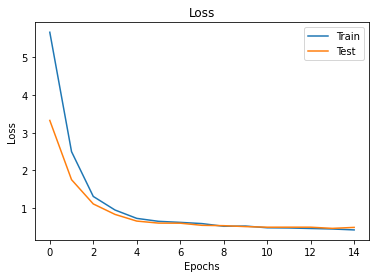

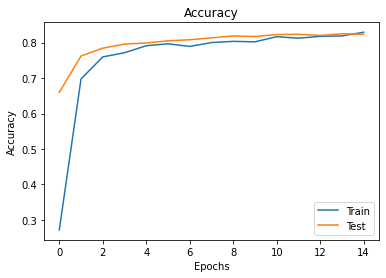

Cross validation round 1
Epoch 1 accuracy 0.6590214067278287
Epoch 2 accuracy 0.7347094801223242
Epoch 3 accuracy 0.7484709480122325
Epoch 4 accuracy 0.7576452599388379
Epoch 5 accuracy 0.77217125382263
Epoch 6 accuracy 0.7714067278287462
Epoch 7 accuracy 0.7874617737003058
Epoch 8 accuracy 0.7744648318042814
Epoch 9 accuracy 0.7813455657492355
Epoch 10 accuracy 0.7882262996941896
Epoch 11 accuracy 0.7821100917431193
Epoch 12 accuracy 0.7859327217125383
Epoch 13 accuracy 0.7859327217125383
Epoch 14 accuracy 0.790519877675841
Epoch 15 accuracy 0.7951070336391437
Ended training
Best test accuracy: 0.7951070336391437


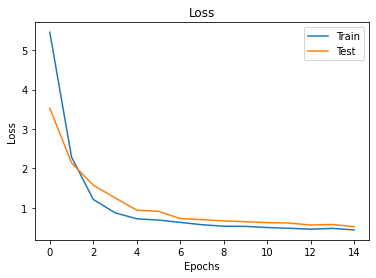

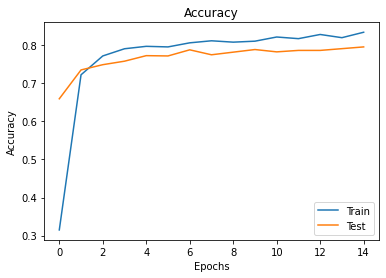

Cross validation round 2
Epoch 1 accuracy 0.6429663608562691
Epoch 2 accuracy 0.7431192660550459
Epoch 3 accuracy 0.7668195718654435
Epoch 4 accuracy 0.7752293577981652
Epoch 5 accuracy 0.7675840978593272
Epoch 6 accuracy 0.7935779816513762
Epoch 7 accuracy 0.7981651376146789
Epoch 8 accuracy 0.7974006116207951
Epoch 9 accuracy 0.7981651376146789
Epoch 10 accuracy 0.7966360856269113
Epoch 11 accuracy 0.8027522935779816
Epoch 12 accuracy 0.7951070336391437
Epoch 13 accuracy 0.8027522935779816
Epoch 14 accuracy 0.7981651376146789
Epoch 15 accuracy 0.8126911314984709
Ended training
Best test accuracy: 0.8126911314984709


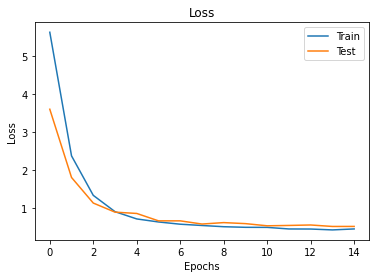

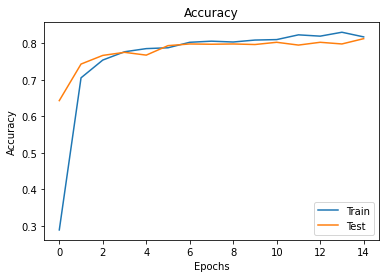

Cross validation round 3
Epoch 1 accuracy 0.6628440366972477
Epoch 2 accuracy 0.7438837920489296
Epoch 3 accuracy 0.7637614678899083
Epoch 4 accuracy 0.7622324159021406
Epoch 5 accuracy 0.7790519877675841
Epoch 6 accuracy 0.7821100917431193
Epoch 7 accuracy 0.7897553516819572
Epoch 8 accuracy 0.7759938837920489
Epoch 9 accuracy 0.7874617737003058
Epoch 10 accuracy 0.7859327217125383
Epoch 11 accuracy 0.7675840978593272
Epoch 12 accuracy 0.7996941896024465
Epoch 13 accuracy 0.7981651376146789
Epoch 14 accuracy 0.7943425076452599
Epoch 15 accuracy 0.8058103975535168
Ended training
Best test accuracy: 0.8058103975535168


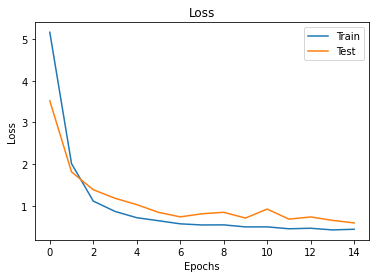

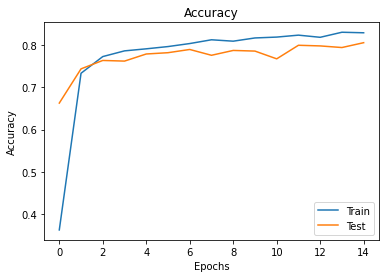

MEAN CROSS VALIDATION ACCURACY 0.8096330275229358


In [ ]:
cross_validation_training(train_paths_array)
# cross_validation_round(train_paths_array, 0)

In this final step, we measure the performance of the network on the test set (the held-out data) for assessing the generalization ability of the model. This result is the most realistic one and is usually lower then what we measure on the validation data. If the model scores well on the test set we hope the model will perform adequately in a real setting as well, however, this is generally not guaranteed. If you are writing a scientific paper, this result would be the most important.

In [ ]:
model = get_resnet_18()
checkpoint = t.load('model cross validation 0.tar')
model.load_state_dict(checkpoint['model'])
model.eval()

test_paths = image_paths(TEST_PATH)
test_paths_array = np.array(test_paths)

loss_fn = t.nn.CrossEntropyLoss()
metrics = eval_network(model, test_loader(test_paths_array), loss_fn)
print('TEST SET ACCURACY', metrics[ACCURACY])

TEST SET ACCURACY 0.8125


## Open Questions / Exercises

### Enhancing metrics

Add more metrics, such as precision, recall, specificity. Display the confusion matrix for the test set. (difficulty - simple)

Create a receiver operating characteristic plot. (difficulty - complex)

### Regularization

Add a dropout layer for the fully connected part of the network. (difficulty - simple) 

### Pretraining

The 'NIH Chest X-rays' (https://www.kaggle.com/nih-chest-xrays/data) contains a much larger volume of chest x-rays, however, they are not properly labeled. Can you use this dataset as an additional pre-training? (difficulty - complex)

### Training

Implement automatic early stopping (making the training stop if there is no progress for a defined number of epochs). (difficulty - simple)

Implement grid search for tuning the meta-parameters. (difficulty - complex) 

### Model variations

Try out other models available in the Torch Vision framework, see if they score better. (difficulty - simple)

Train an ensemble based on the models obtained through cross-validation and evaluate it on the test set. Alternatively, define an ensemble by combining multiple other models of choice and evaluate for both validation and test set. Does it score better ? (difficulty - complex)

Create a model that takes advantage of the image at multiple resolutions (feature pyramid network). You can also reuse available open-source solutions. (difficulty - complex)

### Dataset imbalance

Calculate the metrics separately per each class (in a one versus the rest approach). (difficulty - moderate)

In case there are problems related to class imbalance, how can we better handle them? Ideas: smart sampling of the data while training and loss function manipulation. (difficulty - complex)

### Network activations visualization

There are more ways to visualize the activations of a convolutional neural network with respect to the image. Try implementing one, or use an open-source version. (difficulty - complex)